In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.expanduser("~/auryn/tools/python/"))
from auryntools import *
import quantities as pq
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant.statistics import instantaneous_rate
from elephant.statistics import isi
import plotly.graph_objects as go
from neo.core import SpikeTrain
from scipy import signal
from scipy.io import mmread
import seaborn as sns
import plotly.graph_objects as go

In [2]:
num_mpi_ranks = 4 # the number of sims you used in parallel
datadir = os.path.expanduser("/mnt/data1/data_paul/sim_less_stim_neurons_more_inside_connect_nocons_suit_pat") # Set this to your data path
prefix = "rf1"

In [3]:
spkfiles  = ["%s/%s.%i.e.spk"%(datadir,prefix,i) for i in range(num_mpi_ranks)]
sfo = AurynBinarySpikeView(spkfiles)

Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)
Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)


In [4]:
rateE  = np.mean([pd.read_csv("%s/%s.%i.e.prate"%(datadir,prefix,i),delimiter=' ').values for i in range(num_mpi_ranks)],axis=0)
time_axis = rateE[:,0]
rateE= rateE[:,1]

rateI  = np.mean([pd.read_csv("%s/%s.%i.i2.prate"%(datadir,prefix,i),delimiter=' ' ).values for i in range(num_mpi_ranks)],axis=0)
time_axis_I = rateI[:,0]
rateI= rateI[:,1]
wmatfiles  = ["%s/rf1.%i.ee.wmat"%(datadir,i) for i in range(num_mpi_ranks)]
w = np.sum( [ mmread(wf) for wf in wmatfiles ] )

wmatfilesext  = ["%s/rf1.%i.ext.wmat"%(datadir,i) for i in range(num_mpi_ranks)]
wext = np.sum( [ mmread(wf) for wf in wmatfilesext ] )

wmatfilesie  = ["%s/rf1.%i.ie.wmat"%(datadir,i) for i in range(num_mpi_ranks)]
wie = np.sum( [ mmread(wf) for wf in wmatfilesie ] )

In [5]:
see  = np.concatenate([pd.read_csv("%s/%s.%i.see"%(datadir,prefix,i),delimiter=' ' ).values[:,1:-1] for i in range(3)],axis=1)
sie  = np.concatenate([pd.read_csv("%s/%s.%i.sie"%(datadir,prefix,i),delimiter=' ' ).values[:,1:-1] for i in range(3)],axis=1)
sse  = np.concatenate([pd.read_csv("%s/%s.%i.sse"%(datadir,prefix,i),delimiter=' ' ).values[:,1:-1] for i in range(3)],axis=1)

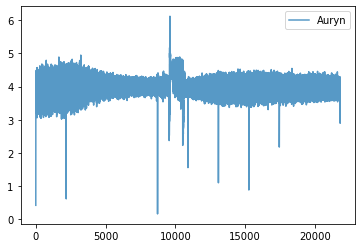

In [6]:
win = signal.windows.hann(10)
plt.plot(time_axis,np.convolve(rateE,win,'same')/ sum(win),label = "Auryn",alpha = 0.75)
plt.legend()
# %%

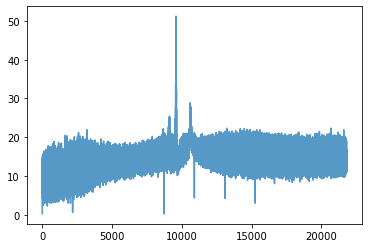

In [8]:
win = signal.windows.hann(10)
plt.plot(time_axis_I,np.convolve(rateI,win,'same')/ sum(win),alpha = 0.75)

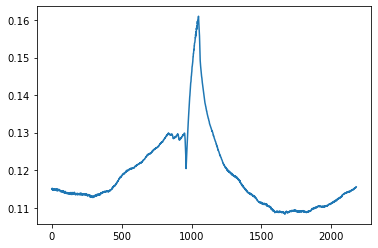

In [9]:
plt.plot(np.mean(sse,axis = 1))

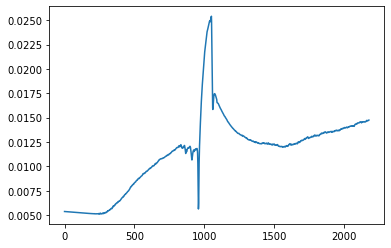

In [10]:
plt.plot(np.mean(sie,axis = 1))

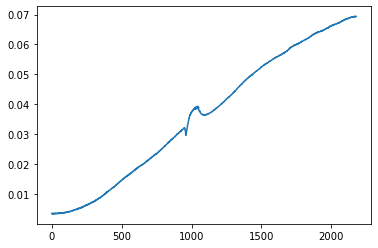

In [11]:
plt.plot(np.mean(see,axis = 1))